In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
data = pd.read_csv("/content/drive/MyDrive/Heart_attack_risk_prediction/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Chest pain (cp)

Resting blood pressure (trtbps)

Cholestoral (chol)

Fasting blood sugar (fbs)

Resting electrocardiographic (restecg)

Maximum heart rate achieved (thalachh)

Exercise induced angina (exng)

Slope (slp)

Number of major vessels (caa)

Thalium Stress Test (thall)

In [9]:
data.shape

(289, 14)

In [38]:
columns =  data.columns
columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [11]:
print("Unique values in each column")
for i in columns:
  print(i,':',data[i].nunique())



Unique values in each column
age : 41
sex : 2
cp : 4
trtbps : 47
chol : 147
fbs : 2
restecg : 3
thalachh : 90
exng : 2
oldpeak : 39
slp : 3
caa : 5
thall : 4
output : 2


In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Hopefully we do not have any null values

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    int64  
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trtbps    289 non-null    int64  
 4   chol      289 non-null    int64  
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    int64  
 7   thalachh  289 non-null    int64  
 8   exng      289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slp       289 non-null    int64  
 11  caa       289 non-null    int64  
 12  thall     289 non-null    int64  
 13  output    289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.7 KB


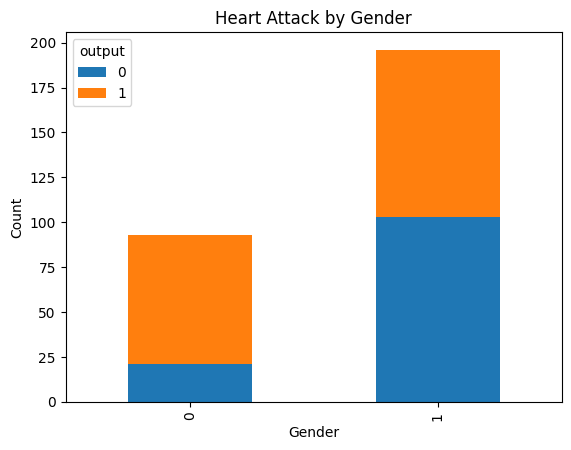

In [39]:
grouped_data = data.groupby(['sex', 'output']).size().unstack(fill_value=0)

# Plot using Matplotlib
grouped_data.plot(kind='bar', stacked=True)
plt.title("Heart Attack by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [ ]:
for col in data.columns:
  print(col, data[col].value_counts, end = "/n")

In [16]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

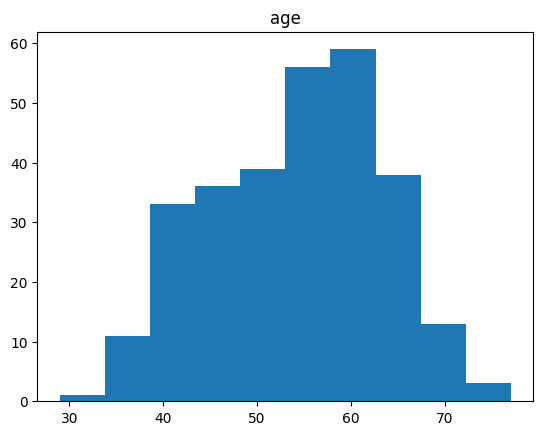

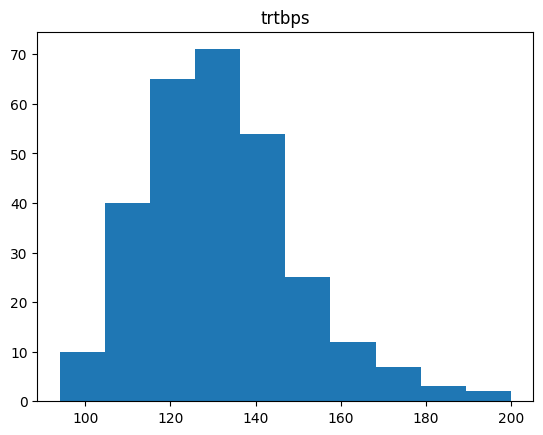

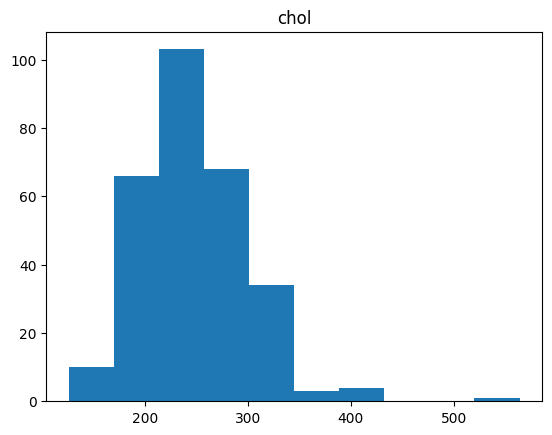

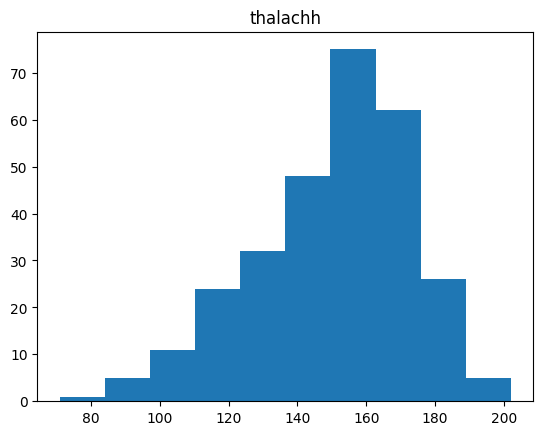

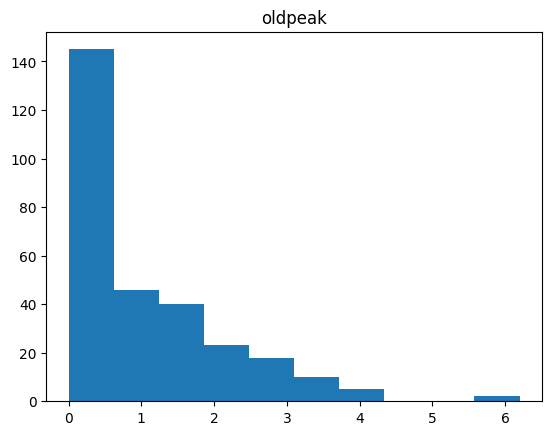

In [17]:
data_numeric = data[['age','trtbps','chol','thalachh','oldpeak']]
data_categorical =data[['sex','cp','fbs','restecg','exng']]

for i in data_numeric.columns:
    plt.hist(data_numeric[i])
    plt.title(i)
    plt.show()

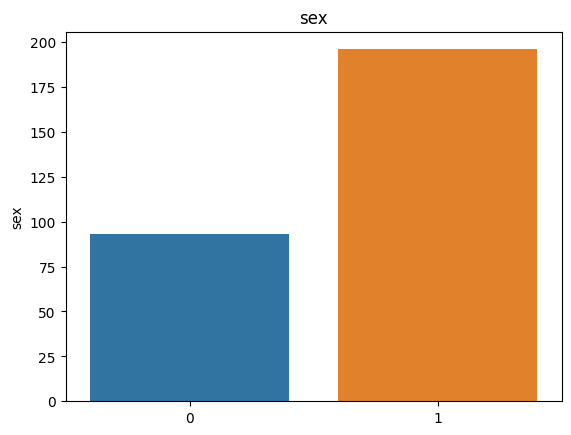

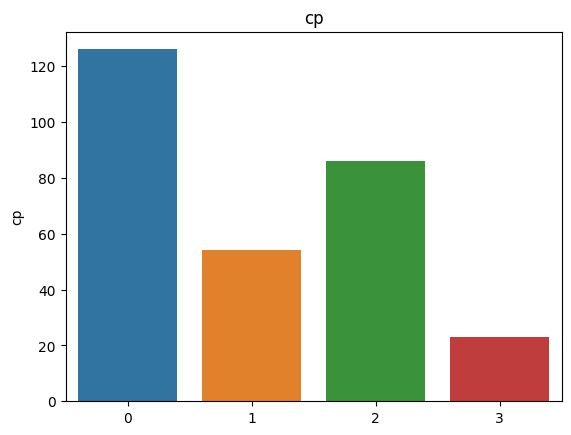

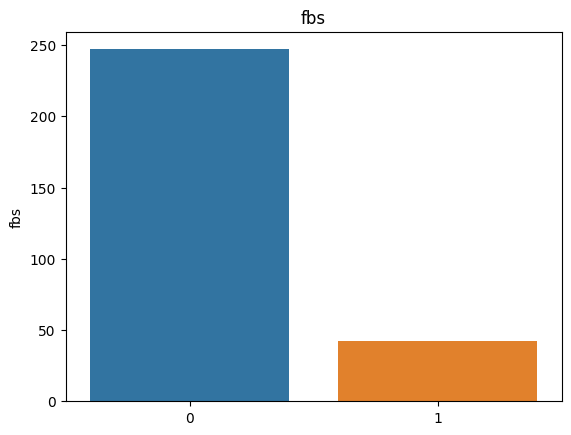

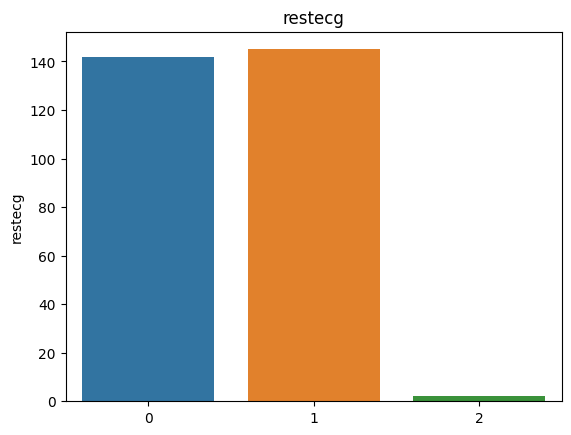

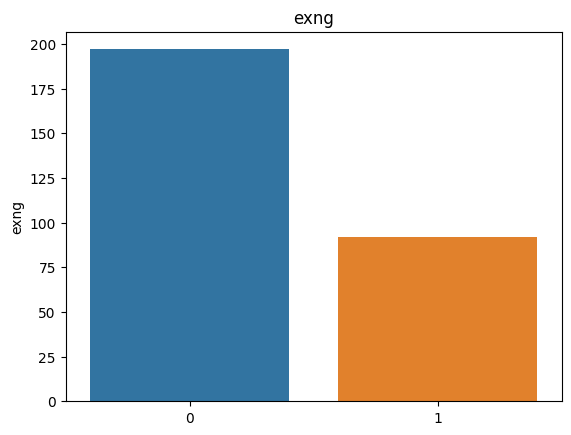

In [18]:

pd.pivot_table(data, index='output', values=['age','trtbps','chol','thalachh','oldpeak'])

for i in data_categorical.columns:
  sns.barplot(x=data_categorical[i].value_counts().index, y = data_categorical[i].value_counts())
  plt.title(i)
  plt.show()

In [19]:
print(pd.pivot_table(data,index='output',columns='sex', values='age'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='cp', values='age'))
print(pd.pivot_table(data,index='output',columns='fbs', values='age'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='restecg', values='age'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='exng', values='age'))

print(pd.pivot_table(data,index='output',columns='sex', values='chol'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='cp', values='chol'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='fbs', values='chol'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='restecg', values='chol'))
print("="*100)
print(pd.pivot_table(data,index='output',columns='exng', values='chol'))

sex            0          1
output                     
0       59.52381  55.456311
1       54.50000  50.784946
cp              0          1          2          3
output                                            
0       55.827586  57.307692  57.529412  54.571429
1       53.923077  50.000000  52.188406  55.812500
fbs             0          1
output                      
0       56.009524  56.894737
1       51.838028  55.913043
restecg          0          1     2
output                             
0        56.837838  55.122449  55.0
1        53.735294  51.218750  76.0
exng           0          1
output                     
0       56.40000  55.942029
1       52.21831  53.565217
sex              0           1
output                        
0       283.095238  249.980583
1       256.750000  230.989247
cp               0           1           2           3
output                                                
0       259.885057  248.769231  240.588235  251.285714
1       245.333333  240

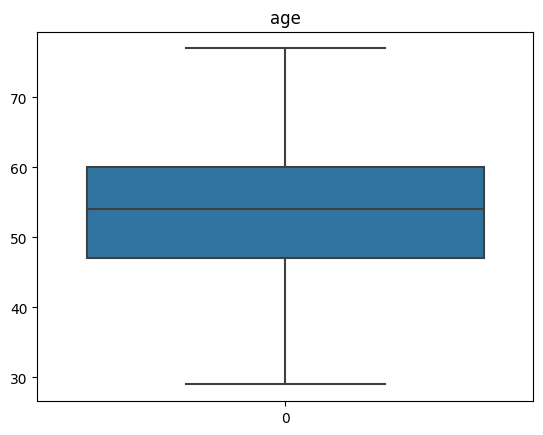

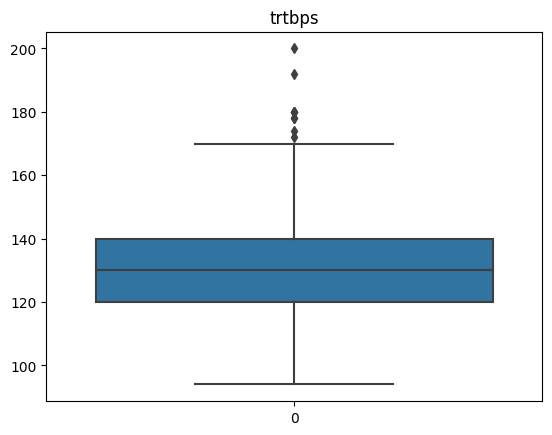

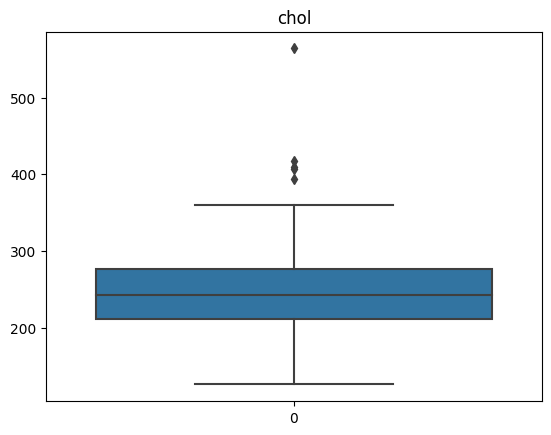

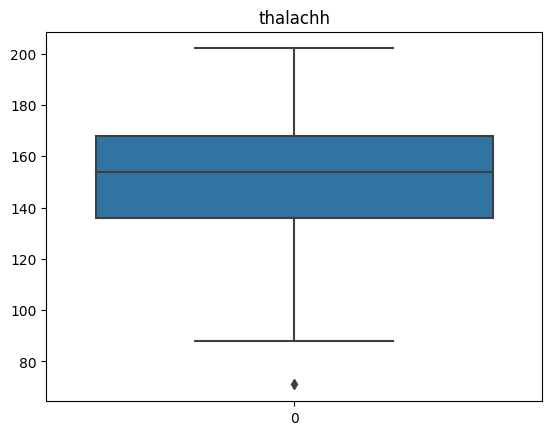

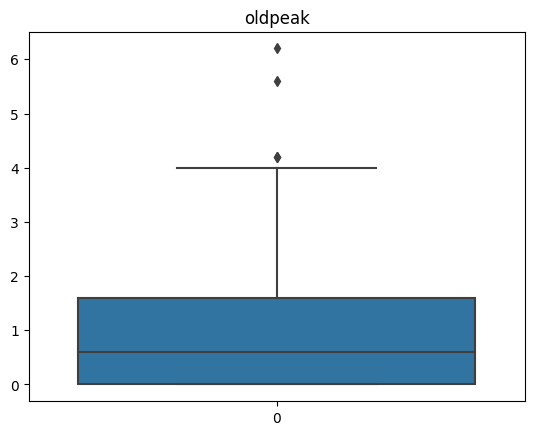

In [20]:
for i in data_numeric.columns:
    sns.boxplot(data_numeric[i])
    plt.title(i)
    plt.show()

In [21]:
def outlinefree(dataCol):
  #sorting column
  sorted(dataCol)

  #getting percentile 25 and 75 that will help us for getting IQR(interquartile range)
  Q1, Q3 = np.percentile(dataCol, [25,75])

  #getting IQR
  IQR = Q3-Q1

  #getting lower range error
  LowerRange = Q1 - (1.5 * IQR)

  #getting upper range error
  UpperRange = Q3 + (1.5 * IQR)

  #return lowerrange and upper range
  return LowerRange, UpperRange

In [22]:
#lower and upper range's
lw_trtbps,up_trtbps = outlinefree(data['trtbps'])
lw_chol,up_chol = outlinefree(data['chol'])
lw_oldpeak,up_oldpeak = outlinefree(data['oldpeak'])

In [23]:
data['chol']

0      233
1      250
2      204
3      236
4      354
      ... 
284    207
285    311
286    204
287    232
288    335
Name: chol, Length: 289, dtype: int64

In [24]:
data['trtbps'].replace(list(data[data['trtbps'] > up_trtbps].trtbps), up_trtbps, inplace = True)
data['chol'].replace(list(data[data['chol'] > up_chol].chol), up_chol, inplace = True)
data['oldpeak'].replace(list(data[data['oldpeak'] > up_oldpeak].oldpeak), up_oldpeak, inplace = True)

In [25]:
features = data.iloc[:, :-1].values
label = data.iloc[:, -1].values


In [40]:
X_train, X_test, y_train, y_test = train_test_split( features, label, test_size=0.25, random_state=102)

#======================= LogisticRegression ==================================

classimodel = LogisticRegression()
classimodel.fit(X_train, y_train)
trainscore = classimodel.score(X_train, y_train)
testscore = classimodel.score(X_test, y_test)

print("test score: {}, train score: {}".format(testscore, trainscore), '\n')

y_pred = classimodel.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

print(' f1 score: ', f1_score(y_test, y_pred), '\n')
print(' precision score: ', precision_score(y_test, y_pred), '\n')
print(' recall score: ', recall_score(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

test score: 0.8493150684931506, train score: 0.8518518518518519 

 f1 score:  0.88659793814433 

 precision score:  0.8269230769230769 

 recall score:  0.9555555555555556 

              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.83      0.96      0.89        45

    accuracy                           0.85        73
   macro avg       0.87      0.82      0.83        73
weighted avg       0.86      0.85      0.84        73



In [41]:
#================= K-Nearest Neighbor(KNN) ========================

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state = 193)

classifier = KNeighborsClassifier()
knnmodel = classifier.fit(X_train, y_train)

trainscore = knnmodel.score(X_train, y_train)
testscore = knnmodel.score(X_test, y_test)

print("test score: {}, train score: {}".format(testscore, trainscore), '\n')

y_predknn = knnmodel.predict(X_test)

print(confusion_matrix(y_test, y_predknn))

print("f1_score: ", f1_score(y_test, y_predknn), '\n')
print("precision_score: ", precision_score(y_test, y_predknn), '\n')
print("recall_score: ", recall_score(y_test, y_predknn), '\n')
print(classification_report(y_test, y_predknn))


test score: 0.684931506849315, train score: 0.7777777777777778 

[[17 16]
 [ 7 33]]
f1_score:  0.7415730337078652 

precision_score:  0.673469387755102 

recall_score:  0.825 

              precision    recall  f1-score   support

           0       0.71      0.52      0.60        33
           1       0.67      0.82      0.74        40

    accuracy                           0.68        73
   macro avg       0.69      0.67      0.67        73
weighted avg       0.69      0.68      0.68        73



In [42]:
#======================= naive bayes ===========================

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state = 34)

NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

trainscore =  NBmodel.score(X_train,y_train)
testscore =  NBmodel.score(X_test,y_test)

print("test score: {}, train score: {}".format(testscore,trainscore),'\n')
y_predNB =  NBmodel.predict(X_test)
print(confusion_matrix(y_test, y_predNB))

print("f1_score: ",f1_score(y_test, y_predNB),'\n')
print("precision_score: ",precision_score(y_test, y_predNB),'\n')
print("recall_score: ",recall_score(y_test, y_predNB),'\n')
print(classification_report(y_test, y_predNB))

test score: 0.821917808219178, train score: 0.8564814814814815 

[[17  7]
 [ 6 43]]
f1_score:  0.8686868686868686 

precision_score:  0.86 

recall_score:  0.8775510204081632 

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        24
           1       0.86      0.88      0.87        49

    accuracy                           0.82        73
   macro avg       0.80      0.79      0.80        73
weighted avg       0.82      0.82      0.82        73



In [43]:
#============================== support vector classification ===============================
X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=8)

svcmodel = SVC(probability=True)
svcmodel.fit(X_train, y_train)

trainscore =  svcmodel.score(X_train,y_train)
testscore =  svcmodel.score(X_test,y_test)

print("test score: {}, train score: {}".format(testscore,trainscore),'\n')

y_predsvc =  svcmodel.predict(X_test)

print(confusion_matrix(y_test, y_predsvc))

print("f1_score: ",f1_score(y_test, y_predsvc),'\n')
print("precision_score: ",precision_score(y_test, y_predsvc),'\n')
print("recall_score: ",recall_score(y_test, y_predsvc),'\n')
print(classification_report(y_test, y_predsvc),'\n')

test score: 0.6438356164383562, train score: 0.6851851851851852 

[[11 24]
 [ 2 36]]
f1_score:  0.7346938775510204 

precision_score:  0.6 

recall_score:  0.9473684210526315 

              precision    recall  f1-score   support

           0       0.85      0.31      0.46        35
           1       0.60      0.95      0.73        38

    accuracy                           0.64        73
   macro avg       0.72      0.63      0.60        73
weighted avg       0.72      0.64      0.60        73
 



the **ROC AUC** score provides a single number that summarizes how well your model is at distinguishing between positive and negative cases, with a higher score indicating better performance. The ROC curve visually shows this performance, allowing you to choose an appropriate probability threshold for your specific application. A model with an ROC AUC score greater than 0.5 is better than random guessing, while a score of 1.0 represents a perfect model.

0.9225806451612902


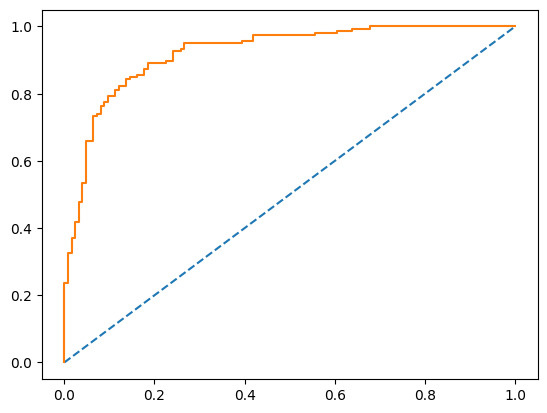

In [45]:
#============================== LogisticRegression ======================================

#predicting the probability of belonging to the positive class
probabilityValues = classimodel.predict_proba(features)[:,1]

#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
#  the False Positive Rate (FPR), True Positive Rate (TPR)
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.8019794721407625


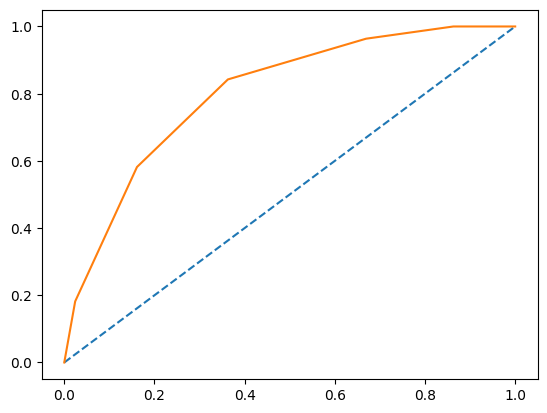

In [31]:
#================================= KNeighborsClassifier =======================================
probabilityValues = knnmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.9128543499511242


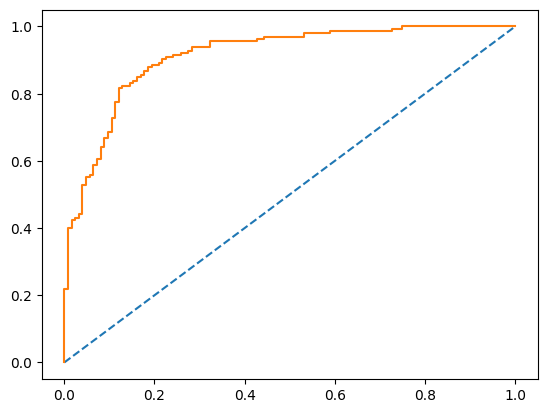

In [32]:
#================================= naive bayes ==================================
probabilityValues = NBmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

0.7510263929618768


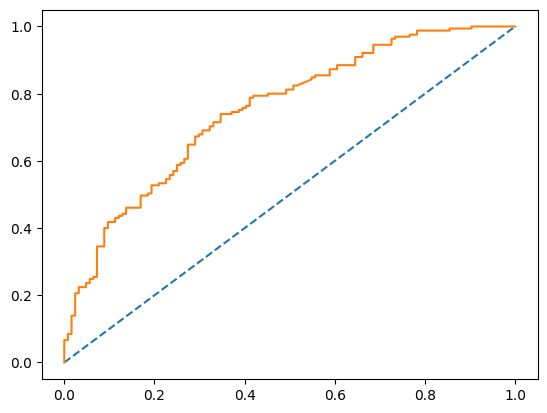

In [33]:
#=========================== SVC ============================
probabilityValues = svcmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

In [34]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

X_train, X_test, y_train, y_test= train_test_split(features,label, test_size= 0.25, random_state=102)

XGmodel= xgb.XGBRFClassifier()
XGmodel.fit(X_train, y_train)
trainscore =  XGmodel.score(X_train,y_train)
testscore =  XGmodel.score(X_test,y_test)

print("test score: {} train score: {}".format(testscore,trainscore),'\n')

y_predXG =  XGmodel.predict(X_test)

#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

print("f1_score: ",f1_score(y_test, y_predXG),'\n')
print("precision_score: ",precision_score(y_test, y_predXG),'\n')
print("recall_score: ",recall_score(y_test, y_predXG),'\n')
print(classification_report(y_test, y_predXG),'\n')

test score: 0.9041095890410958 train score: 0.9212962962962963 

f1_score:  0.9230769230769231 

precision_score:  0.9130434782608695 

recall_score:  0.9333333333333333 

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.91      0.93      0.92        45

    accuracy                           0.90        73
   macro avg       0.90      0.90      0.90        73
weighted avg       0.90      0.90      0.90        73
 



0.968475073313783


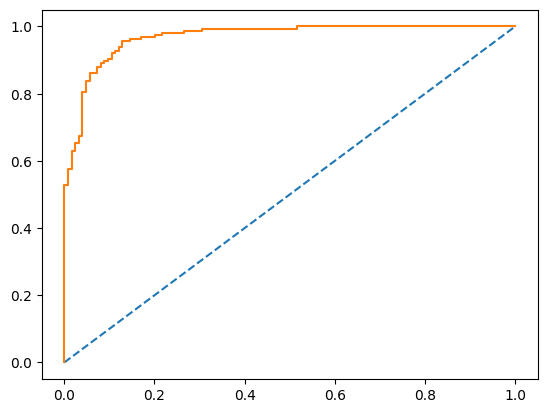

In [35]:
#=============================== SVC ===================================
probabilityValues = XGmodel.predict_proba(features)[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)